**ANALYSIS ON ENGLISH PREMIER LEAGUE FOOTBALLL DATA SET**

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving EPL_Set.csv to EPL_Set.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px

In [ ]:
df = pd.read_csv('EPL_Set.csv')
df.head()


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,14/08/93,Arsenal,Coventry,0,3,A,NaN,NaN,NaN,1993-94
1,E0,14/08/93,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,1993-94
2,E0,14/08/93,Chelsea,Blackburn,1,2,A,NaN,NaN,NaN,1993-94
3,E0,14/08/93,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,1993-94
4,E0,14/08/93,Man City,Leeds,1,1,D,NaN,NaN,NaN,1993-94


In [ ]:
#since the half time data  goals are not available for season 1993-1994 and 1994-1995, lets remove them from the dataset and lets start our analysis from season 1994-1995

df['Season'] = df['Season'].astype('str')

df = df[df['Season'] != '1993-94']

df = df[df['Season'] != '1994-95']

df.reset_index(inplace = True,drop = True)


In [ ]:
df.head()



,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season
0,E0,19/08/95,Aston Villa,Man United,3,1,H,3.0,0.0,H,1995-96
1,E0,19/08/95,Blackburn,QPR,1,0,H,1.0,0.0,H,1995-96
2,E0,19/08/95,Chelsea,Everton,0,0,D,0.0,0.0,D,1995-96
3,E0,19/08/95,Liverpool,Sheffield Weds,1,0,H,0.0,0.0,D,1995-96
4,E0,19/08/95,Man City,Tottenham,1,1,D,0.0,1.0,A,1995-96


In [ ]:
#Now lets insepect the data set.

print('the total number of rows in the data set is', len(df))
print('The total number of features in the data set is',len(df.columns))


the total number of rows in the data set is 8740
The total number of features in the data set is 11


In [ ]:
df['SH_Total'] = df['FTHG'] - df['HTHG'] + df['FTAG'] - df['HTAG']
df['HT_Total'] = df['HTHG'] + df['HTAG']



In [ ]:
df['SH_Total'].sum()

12915.0

In [ ]:
df['HT_Total'].sum()

10260.0

In [ ]:
#lets check of for the null  values

print('The number of null values present in each column is')
df.isna().sum()

#we can see that there no null values present

The number of null values present in each column is


Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Season      0
SH_Total    0
HT_Total    0
dtype: int64

In [ ]:
#lets check the number of seasons for which the data is present

print('the total number of season for which the data is present is',df.Season.nunique())

#lets check the number of divisons present in the data set and if that fetaures makes any sense altogether

print('the number of different divsions is',df.Div.value_counts())

the total number of season for which the data is present is 23
the number of different divsions is E0    8740
Name: Div, dtype: int64


In [ ]:
df.drop('Div',inplace = True,axis = 1)

**We can see that every season there are a constant number of 380 matches being played**

In [ ]:
#lets the check the number of unique teams
print('the number of unique teams is', df['HomeTeam'].nunique())


the number of unique teams is 48


In [ ]:
#lets convert the FTR into respective teams who won the match, so that it will easier for analyis
for i in range(0,len(df)):
  if df['FTHG'][i] >  df['FTAG'][i]:
    df['FTR'][i] = df['HomeTeam'][i]
  elif df['FTHG'][i] < df['FTAG'][i]:
    df['FTR'][i] = df['AwayTeam'][i]
  else:
    df['FTR'][i] = 'Draw Match'



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head()

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,SH_Total,HT_Total
0,19/08/95,Aston Villa,Man United,3,1,Aston Villa,3.0,0.0,H,1995-96,1.0,3.0
1,19/08/95,Blackburn,QPR,1,0,Blackburn,1.0,0.0,H,1995-96,0.0,1.0
2,19/08/95,Chelsea,Everton,0,0,Draw Match,0.0,0.0,D,1995-96,0.0,0.0
3,19/08/95,Liverpool,Sheffield Weds,1,0,Liverpool,0.0,0.0,D,1995-96,1.0,0.0
4,19/08/95,Man City,Tottenham,1,1,Draw Match,0.0,1.0,A,1995-96,1.0,1.0


In [ ]:
# Similarly lets convert the half time results as well
for i in range(0,len(df)):
  if df['HTHG'][i] > df['HTAG'][i]:
    df['HTR'][i] = df['HomeTeam'][i]
  elif df['HTHG'][i] < df['HTAG'][i]:
    df['HTR'][i] = df['AwayTeam'][i]
  else:
    df['HTR'][i] = 'Draw Match'


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
df.head()

df7 = df[df['HomeTeam'] == 'Man United']

df8 = df7[df7['AwayTeam'] == 'Arsenal']

df8.head()
len(df8)

23

In [ ]:
df9 = df[df['AwayTeam'] == 'Man United']
df10 = df9[df9['HomeTeam'] == 'Arsenal']
df10.head()
df11 = pd.concat([df8,df10])


In [ ]:
fig = px.pie(df11,names = 'FTR')

fig.update_layout(title = 'Performance of Manchester United vs Arsenal')

fig.show()

**Lets see the team who has won the maximum number of matches from 1995 to 2008 in premier league**

In [ ]:
#lets find the top 7 teams who won the maximum no of matches

df1 = df[df['FTR'] != 'Draw Match']

df1.head()


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Season,SH_Total,HT_Total
0,19/08/95,Aston Villa,Man United,3,1,Aston Villa,3.0,0.0,Aston Villa,1995-96,1.0,3.0
1,19/08/95,Blackburn,QPR,1,0,Blackburn,1.0,0.0,Blackburn,1995-96,0.0,1.0
3,19/08/95,Liverpool,Sheffield Weds,1,0,Liverpool,0.0,0.0,Draw Match,1995-96,1.0,0.0
5,19/08/95,Newcastle,Coventry,3,0,Newcastle,1.0,0.0,Newcastle,1995-96,2.0,1.0
6,19/08/95,Southampton,Nott'm Forest,3,4,Nott'm Forest,1.0,3.0,Nott'm Forest,1995-96,3.0,4.0


In [ ]:
df2 = pd.DataFrame(df1['FTR'].value_counts()[0:7].reset_index())
df2.columns = ['Team name','Number of wins']

fig = px.bar(df2, x = 'Team name', y = 'Number of wins',color = 'Number of wins', title = 'Top 7 teams with the maximum number of wins')


fig.show()


**Manchester United has won the highest number of matches in premier league from 1995 to 2018**

In [ ]:
#lets check the top 7 relative percentages of teams who won the maximum number of matches
ax1 = pd.DataFrame(df['HomeTeam'].value_counts().reset_index())
ax1.columns = ['Team Name', 'Matches Played at Home']

ax1

,Team Name,Matches Played at Home
0,Liverpool,437
1,Chelsea,437
2,Arsenal,437
3,Man United,437
4,Tottenham,437
5,Everton,437
6,Aston Villa,399
7,Newcastle,399
8,West Ham,380
9,Man City,342


In [ ]:
ax2 = pd.DataFrame(df['AwayTeam'].value_counts().reset_index())
ax2.columns = ['Team Name','Matches Played at Away']

ax2

,Team Name,Matches Played at Away
0,Liverpool,437
1,Chelsea,437
2,Arsenal,437
3,Man United,437
4,Tottenham,437
5,Everton,437
6,Aston Villa,399
7,Newcastle,399
8,West Ham,380
9,Man City,342


We can see that there are equal number of matches played by each team in both home and away. This means that total number of matches playd by each team is Matches played at home plus matches played at away. This also verifies that there isnt any kind of a disperancy in the data set

In [ ]:
ax1['Total matches played'] = 2*ax1['Matches Played at Home']

ax1

,Team Name,Matches Played at Home,Total matches played
0,Liverpool,437,874
1,Chelsea,437,874
2,Arsenal,437,874
3,Man United,437,874
4,Tottenham,437,874
5,Everton,437,874
6,Aston Villa,399,798
7,Newcastle,399,798
8,West Ham,380,760
9,Man City,342,684


In [ ]:
#lets find the total matches won by each team

ax3 = pd.DataFrame(df1['FTR'].value_counts().reset_index())
ax3.columns = ['Team Name', 'Matches won']

ax4 = pd.merge(ax3,ax1, on = 'Team Name')

ax4.head()

,Team Name,Matches won,Matches Played at Home,Total matches played
0,Man United,552,437,874
1,Arsenal,498,437,874
2,Chelsea,497,437,874
3,Liverpool,445,437,874
4,Tottenham,380,437,874


In [ ]:
ax4['Relative percentage'] = ax4['Matches won'] * 100.0/ ax4['Total matches played']

ax4 = ax4.sort_values('Relative percentage', ascending = False)




In [ ]:
ax4.head()

fig = px.bar(ax4[0:7], x = 'Relative percentage', y = 'Team Name',color = 'Relative percentage',hover_data = ['Matches won','Total matches played','Relative percentage'], title = 'Top 7 teams with highest relative percentage of wins',orientation = 'h')


fig.show()

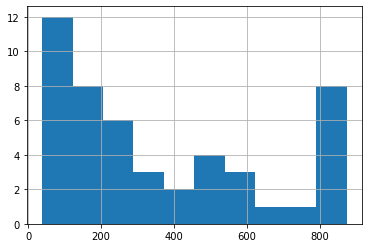

In [ ]:
ax4['Total matches played'].hist()

In [ ]:
ax4.head()

,Team Name,Matches won,Matches Played at Home,Total matches played,Relative percentage
0,Man United,552,437,874,63.157895
1,Arsenal,498,437,874,56.979405
2,Chelsea,497,437,874,56.864989
3,Liverpool,445,437,874,50.915332
6,Man City,323,342,684,47.222222


We can observe that there are some new names appearing in the list such as leeds who have have greater conversion of the wins.


**We can see that there are some popular teams across the years. Lets check which team dominates the most at home and away ??**. 

In [ ]:
df2 = df1[df1['HomeTeam'] == df1['FTR']]

df3 = pd.DataFrame(df2['FTR'].value_counts().reset_index())

df3.columns = ['Team name','Number of wins in home ground']

fig = px.bar(df3[0:7], x = 'Team name', y = 'Number of wins in home ground',color = 'Number of wins in home ground', title = 'Top 7 teams with the maximum number of wins at home ground')


fig.show()

In [ ]:

df2 = df1[df1['AwayTeam'] == df1['FTR']]

df3 = pd.DataFrame(df2['FTR'].value_counts().reset_index())

df3.columns = ['Team name','Number of wins in away ground']

fig = px.bar(df3[0:7], x = 'Team name', y = 'Number of wins in away ground',color = 'Number of wins in away ground', title = 'Top 7 teams with the maximum number of wins at Away ground')

fig.show()


**Manchester United dominates in both Home and Away ground matches**

**Now lets check if the there is any relation between the teams who leads at half time and the actual winners at full time**

In [ ]:
df3 = df1[df1['FTR'] == df1['HTR']]

df4 = df1[df1['HTR'] != 'Draw Match']

percentage = len(df3) * 100 / len(df4)

percentage

percentage1 = 100 - percentage

In [ ]:
fig = go.Figure(data = [go.Bar(name = 'Same team wins who lead at half time', x = ['One Team leads at half time'], y = [percentage]), go.Bar(name = 'Different team wins ', x = ['One Team leads at half time'], y = [percentage1])])
fig.update_layout(barmode = 'group',width = 800,height = 700)
fig.show()

In [ ]:
df11 = pd.DataFrame()
df11['Final Result'] = ['Same Team wins','Different teams wins ']
df11['Final result percentage'] = [percentage,percentage1]

In [ ]:
fig = px.line(df11, x = 'Final Result', y = 'Final result percentage', title = 'What happens when one team leads at half time')
fig.update_xaxes(title_text = 'One team leads at half time')
fig.update_yaxes(title_text = 'Final result percentage')
fig.show()

**What happens when the half time result is draw. What percentage of matches actually end up in draw**

In [ ]:
ax4 = df[df['HTR'] == 'Draw Match']

ax5 = ax4[ax4['FTR'] == 'Draw Match']

temp = len(ax5) * 100 /len(ax4)

temp1 = 100 - temp

print('The percentage of matches which actually end up in draw when half time result is draw is',temp)
print('The percentage of matches which does not end up in draw when the scores are level at half time is', temp1)

The percentage of matches which actually end up in draw when half time result is draw is 38.488719760804564
The percentage of matches which does not end up in draw when the scores are level at half time is 61.511280239195436


In [ ]:
fig = go.Figure(data = [go.Bar(name = 'Full time is a draw', x = ['scores are level at half time'], y = [temp]), go.Bar(name = 'Full time is not a draw', x = ['scores are level at half time'], y = [temp1])])
fig.update_layout(barmode = 'group',width = 800,height = 700)
fig.show()

In [ ]:
df10 = pd.DataFrame()
df10['Final Result'] = ['Full Time is a draw','Full Time is not a draw']
df10['Win percentage'] = [61.551128,38.48872]
fig = px.line(df10, x = 'Final Result', y = 'Win percentage', title = 'What happens when the scores are level at half time')
fig.update_xaxes(title_text = 'scores are level at half time')
fig.update_yaxes(title_text = 'Final result percentage')
fig.show()


In [ ]:
#Lets see which teams does the maximum comebacks to win the match the after at a losing stage at half time

ax5 = df1[df1['HTR'] != 'Draw Match']


ax6 = ax5[ax5['FTR'] != ax5['HTR']]




In [ ]:
df3 = pd.DataFrame(ax6['FTR'].value_counts())
df3.reset_index(inplace = True)

df3.columns = ['Team Names','Number of comebacks']



In [ ]:
fig = px.line(df3[0:5], x = 'Team Names', y = 'Number of comebacks', title = 'Top Teams with highest comebacks')

fig.show()

**Arsenal is the team which makes maximum number of comebacks**

In [ ]:
#It is already known that manchester city won in 2017-2018 . lets check their performance in other years as well

ax1 = df1[df1['FTR'] == 'Man City']

ax2 = pd.DataFrame(ax1['Season'].value_counts())

ax2.reset_index(inplace = True)

ax2.columns = ['Season','Number of wins']

ax2

,Season,Number of wins
0,2017-18,32
1,2011-12,28
2,2013-14,27
3,2014-15,24
4,2016-17,23
5,2012-13,23
6,2010-11,21
7,2015-16,19
8,2009-10,18
9,2002-03,15


In [ ]:
ax2['Season'] = ax2['Season'].astype('str')



In [ ]:
ax2['year'] = 0



In [ ]:
for i in range(0,len(ax2['Season'])):
  ax2['year'][i] = ax2['Season'][i][0:4]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
ax2 = ax2.sort_values('year',ascending= False)

In [ ]:
ax2

,Season,Number of wins,year
0,2017-18,32,2017
4,2016-17,23,2016
7,2015-16,19,2015
3,2014-15,24,2014
2,2013-14,27,2013
5,2012-13,23,2012
1,2011-12,28,2011
6,2010-11,21,2010
8,2009-10,18,2009
11,2008-09,15,2008


In [ ]:
fig = px.line(ax2, x = 'year', y = 'Number of wins', title = 'Number of wins across the seasons by Manchester City')

fig.show()

**Finally lets check what is the impact of home ground on teams scoring the goals**

In [ ]:
ax5 = df.groupby('HomeTeam')['FTHG'].sum()

df5 = pd.DataFrame(ax5.reset_index())

df5.columns = ['Team Name','Number of home goals scored']




In [ ]:
df5 = df5.sort_values('Number of home goals scored',ascending = False)

df5.head()

,Team Name,Number of home goals scored
26,Man United,951
0,Arsenal,940
13,Chelsea,899
24,Liverpool,859
41,Tottenham,751


In [ ]:
ax6 = df.groupby('AwayTeam')['FTAG'].sum()
df6 = pd.DataFrame(ax6.reset_index())
df6.columns = ['Team Name','Number of away goals scored']
df6.head()

,Team Name,Number of away goals scored
0,Arsenal,687
1,Aston Villa,445
2,Barnsley,12
3,Birmingham,111
4,Blackburn,294


In [ ]:
ax6 = ax6.sort_values(ascending = False)

ax7 = pd.merge(df5,df6, on = 'Team Name')

ax7.head()

,Team Name,Number of home goals scored,Number of away goals scored
0,Man United,951,749
1,Arsenal,940,687
2,Chelsea,899,658
3,Liverpool,859,640
4,Tottenham,751,549


In [ ]:
ax7['differences'] = ax7['Number of home goals scored'] - ax7['Number of away goals scored']





In [ ]:

fig = go.Figure()

fig.add_trace(go.Box(y = ax7['Number of home goals scored'],name = 'Number of home goals',boxmean=True))
fig.add_trace(go.Box(y = ax7['Number of away goals scored'],name = 'Number of away goals',boxmean = True))
fig.update_layout(title_text = 'Box plot for number of home and away goals scored')
fig.update_traces(boxpoints='all', jitter=0)
fig.show()

**We can clearly see that the Number of home goals is way more than the number of away goals scored. Therefore we can say that there is a definite advantage for the home team**

In [ ]:
fig = px.scatter(ax7, x = 'Number of home goals scored',y = 'Number of away goals scored',hover_data = ['Team Name'],color = 'Team Name', size = 'Number of home goals scored',title = 'Scatter plot for Total Number of home and away goals scored')
fig.show()

**Scatter plot confirms that every Team has scored more number of home goals than away. This further confirms our result that there is a definite home advantage**